#SIMULAÇÃO DE UMA COMUNICAÇÃO DE TELEMETRIA EM CANAL GAUSSSIANO (AWGN) COM DESVANECIMENTO RAYLEIGH

####BIBLIOTECAS UTILIZADAS NA SIMULAÇÃO

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc


####Parâmetros para SIMULAÇÃO

In [ ]:
#Parâmentros para Simulação

num_samples =  2000000  #Número de Amostras
low = 0.0              # Valor mínimo da variável aleatória uniforme
high = 1.0            # Valor máximo da variável aleatória uniforme
std_dev = 0.5        # Desvio padrão do ruído gaussiano
EbNo_dB = 10 
EbNo_range = np.arange(-10, 10, 1)  # Faixa de valores de SNR em dB

#MODULAÇÃO : BPSK

####VARIÁVEL ALEATÓRIA UNIFORME

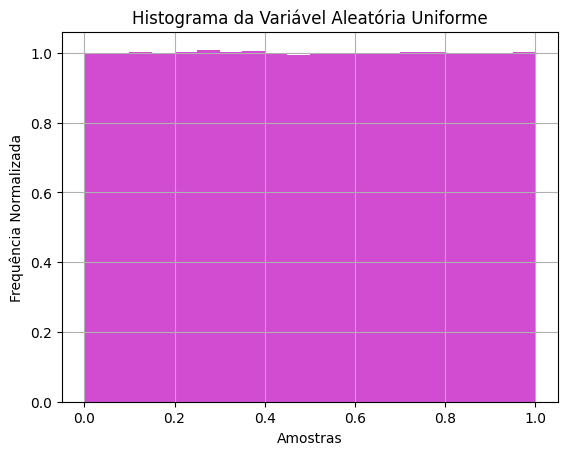

In [ ]:

# Simulação do canal

channel_samples = np.random.uniform(low, high, num_samples)

# Visualização do resultado

plt.figure()
plt.hist(channel_samples, bins=20, density=True, alpha=0.7,color= 'm')
plt.xlabel('Amostras')
plt.ylabel('Frequência Normalizada')
plt.title('Histograma da Variável Aleatória Uniforme')
plt.grid(True)
plt.show()


####VARIÁVEL ALEATÓRIA RAYLEIGH

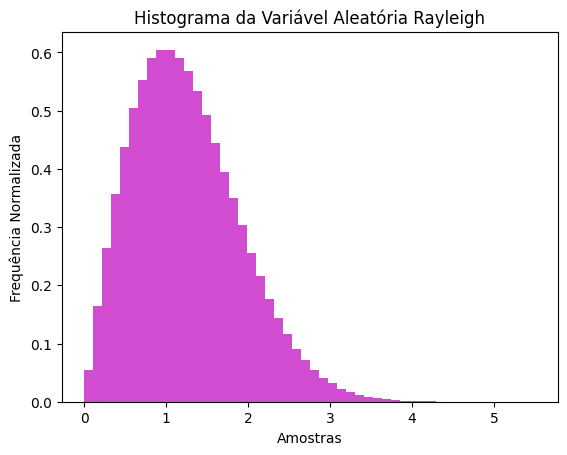

In [ ]:

# Gera variáveis aleatórias uniformes
uniform_samples = np.random.uniform(size=num_samples)
    
    
# Geração das variáveis aleatórias Rayleigh
# Aplica a transformação para gerar variáveis aleatórias Rayleigh
rayleigh_samples = np.sqrt(-2 * np.log(uniform_samples))


# Visualização dos resultados
plt.figure()
plt.hist(rayleigh_samples, bins=50, density=True, alpha=0.7, label='Rayleigh', color = 'm')
plt.xlabel('Amostras')
plt.ylabel('Frequência Normalizada')
plt.title('Histograma da Variável Aleatória Rayleigh')
plt.show()

####VARIÁVEL ALEATÓRIA GAUSSIANA

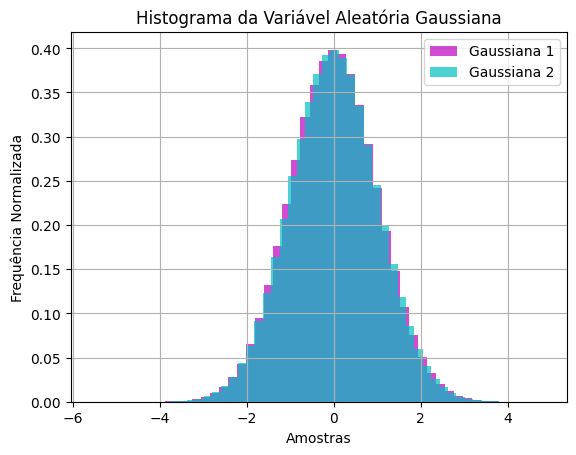

In [ ]:
# Gera variáveis aleatórias uniformes
uniform_samples_1 = np.random.uniform(size=num_samples)
uniform_samples_2 = np.random.uniform(size=num_samples)
    
# Aplica as transformações para gerar variáveis aleatórias Gaussianas
gaussian_samples_1 = np.sqrt(-2 * np.log(uniform_samples_1)) * np.cos(2 * np.pi * uniform_samples_2)
gaussian_samples_2 = np.sqrt(-2 * np.log(uniform_samples_1)) * np.sin(2 * np.pi * uniform_samples_2)
    
# Visualização dos resultados

plt.figure()
plt.hist(gaussian_samples_1, bins=50, density=True, alpha=0.7, label='Gaussiana 1', color = 'm')
plt.hist(gaussian_samples_2, bins=50, density=True, alpha=0.7, label='Gaussiana 2', color = 'c')
plt.xlabel('Amostras')
plt.ylabel('Frequência Normalizada')
plt.title('Histograma da Variável Aleatória Gaussiana')
plt.grid(True)
plt.legend()

plt.show()

####VARIÁVEL ALEATÓRIA GAUSSIANA COM DESVIO PADRÃO

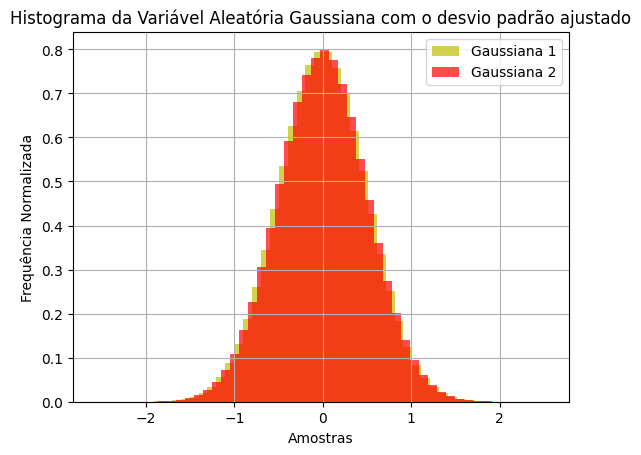

In [ ]:
# Gera variáveis aleatórias uniformes
uniform_samples_1 = np.random.uniform(size=num_samples)
uniform_samples_2 = np.random.uniform(size=num_samples)
    
# Aplica as transformações para gerar variáveis aleatórias Gaussianas com Desvios Padrão
gaussian_samples_1 = std_dev *np.sqrt(-2 * np.log(uniform_samples_1)) * np.cos(2 * np.pi * uniform_samples_2)
gaussian_samples_2 = std_dev *np.sqrt(-2 * np.log(uniform_samples_1)) * np.sin(2 * np.pi * uniform_samples_2)
    
# Visualização dos resultados

plt.figure()
plt.hist(gaussian_samples_1, bins=50, density=True, alpha=0.7, label='Gaussiana 1', color  = 'y')
plt.hist(gaussian_samples_2, bins=50, density=True, alpha=0.7, label='Gaussiana 2', color = 'r')
plt.xlabel('Amostras')
plt.ylabel('Frequência Normalizada')
plt.title('Histograma da Variável Aleatória Gaussiana com o desvio padrão ajustado')
plt.grid(True)
plt.legend()

plt.show()

####PROBALIDADE DE ERRO NO BIT - AWGN

<ipython-input-24-44229a6c1afe>:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(EbNo_range, ber_simulated, 'bo-', label='Simulado',color = 'y')


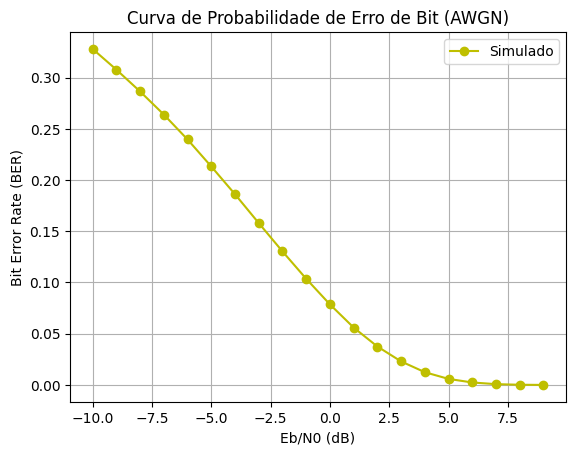

In [ ]:

EbN0_linear = 10 ** (EbNo_range / 10)  # Conversão de dB para linear
# Geração dos símbolos de transmissão
tx_bits = np.random.randint(0, 2, num_samples)  # Sequência de bits aleatórios
tx_symbols = 2 * tx_bits - 1  # Mapeamento: 0 -> -1, 1 -> 1

# Loop para calcular a probabilidade de erro de bit para cada valor de Eb/N0
ber_simulated = []
ber_theoretical = []
for snr_linear in EbN0_linear:

    # Cálculo do ruído
    noise_std = np.sqrt(1 / (2 * snr_linear))  # Desvio padrão do ruído
    noise = noise_std * np.random.randn(num_samples)

    # Sinal recebido com ruído
    rx_symbols = tx_symbols + noise

    # Detecção de erros
    rx_bits = np.where(rx_symbols < 0, 0, 1)
    errors = np.sum(tx_bits != rx_bits)
    ber_simulated.append(errors / num_samples)

# Plot da curva de BER
plt.plot(EbNo_range, ber_simulated, 'bo-', label='Simulado',color = 'y')
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('Curva de Probabilidade de Erro de Bit (AWGN)')
plt.grid(True)
plt.legend()
plt.show()

####PROBALIDADE DE ERRO NO BIT - AWGN + TEÓRICO


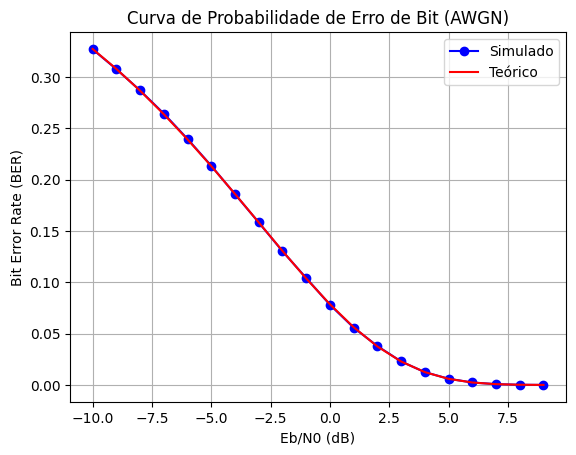

In [ ]:

EbN0_linear = 10 ** (EbNo_range / 10)  # Conversão de dB para linear


# Geração dos símbolos de transmissão
tx_bits = np.random.randint(0, 2, num_samples)  # Sequência de bits aleatórios
tx_symbols = 2 * tx_bits - 1  # Mapeamento: 0 -> -1, 1 -> 1

# Loop para calcular a probabilidade de erro de bit para cada valor de Eb/N0
ber_simulated = []
ber_theoretical = []
for snr_linear in EbN0_linear:
    # Cálculo do ruído
    noise_std = np.sqrt(1 / (2 * snr_linear))  # Desvio padrão do ruído
    noise = noise_std * np.random.randn(num_samples)

    # Sinal recebido com ruído
    rx_symbols = tx_symbols + noise

    # Detecção de erros
    rx_bits = np.where(rx_symbols < 0, 0, 1)
    errors = np.sum(tx_bits != rx_bits)
    ber_simulated.append(errors / num_samples)

    # Cálculo teórico da probabilidade de erro de bit
    ber_theoretical.append(0.5 * erfc(np.sqrt(snr_linear)))

# Plot da curva de BER
plt.plot(EbNo_range, ber_simulated, 'bo-', label='Simulado')
plt.plot(EbNo_range, ber_theoretical, 'r-', label='Teórico')
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('Curva de Probabilidade de Erro de Bit (AWGN)')
plt.grid(True)
plt.legend()
plt.show()

####PROBALIDADE DE ERRO NO BIT - AWGN + RAYLEIGH

<ipython-input-28-3aab09fe8b36>:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.semilogy(EbNo_range, ber_simulated, 'bo-', label='Simulado', color = 'm')


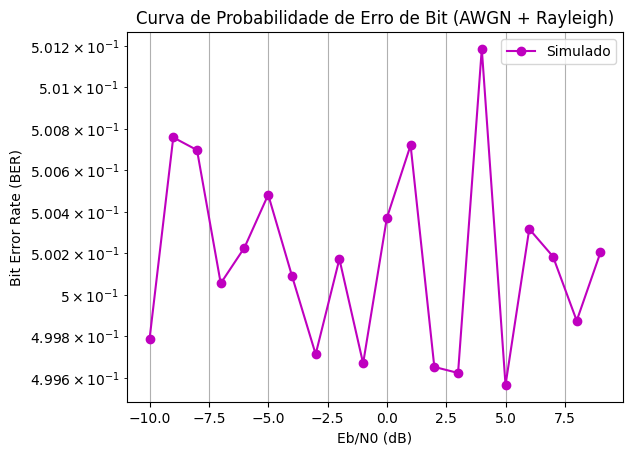

In [ ]:
EbN0_linear = 10**(EbNo_range / 10)  # Conversão de dB para linear

# Geração dos símbolos de transmissão
tx_bits = np.random.randint(0, 2, num_samples)  # Sequência de bits aleatórios
tx_symbols = 2 * tx_bits - 1  # Mapeamento: 0 -> -1, 1 -> 1

# Loop para calcular a probabilidade de erro de bit para cada valor de Eb/N0
ber_simulated = []

for snr_linear in EbN0_linear:
  
    # Cálculo do ruído AWGN
    noise_std_awgn = np.sqrt(1 / (2 * snr_linear))  # Desvio padrão do ruído AWGN
    noise_awgn = noise_std_awgn * np.random.randn(num_samples)

    # Cálculo do desvanecimento Rayleigh
    fading = np.sqrt(0.5) * (np.random.randn(num_samples) + 1j * np.random.randn(num_samples))

    # Sinal recebido com ruído AWGN e desvanecimento Rayleigh
    rx_symbols = fading * tx_symbols + noise_awgn

    # Detecção de erros
    rx_bits = np.where(rx_symbols < 0, 0, 1)
    errors = np.sum(tx_bits != rx_bits)
    ber_simulated.append(errors / num_samples)


# Plot da curva de BER
plt.semilogy(EbNo_range, ber_simulated, 'bo-', label='Simulado', color = 'm')
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('Curva de Probabilidade de Erro de Bit (AWGN + Rayleigh)')
plt.grid(True)
plt.legend()
plt.show()

####PROBALIDADE DE ERRO NO BIT - AWGN + RAYLEIGH + TEORICO

<ipython-input-29-bb22959f02dd>:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.semilogy(EbNo_range, ber_simulated, 'bo-', label='Simulado', color = 'g')
<ipython-input-29-bb22959f02dd>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.semilogy(EbNo_range, ber_theoretical, 'r-', label='Teórico', color = 'm')


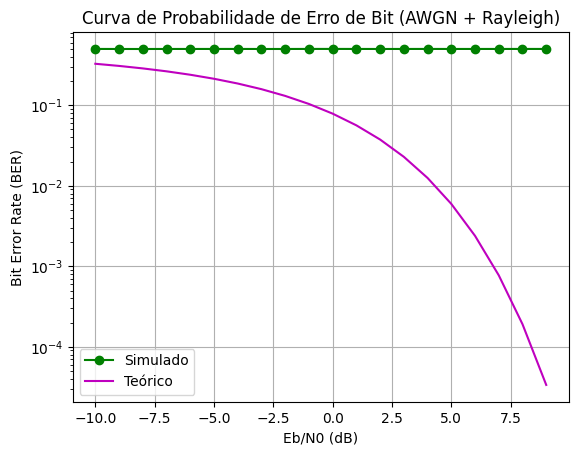

In [ ]:

EbN0_linear = 10**(EbNo_range / 10)  # Conversão de dB para linear

# Geração dos símbolos de transmissão
tx_bits = np.random.randint(0, 2, num_samples)  # Sequência de bits aleatórios
tx_symbols = 2 * tx_bits - 1  # Mapeamento: 0 -> -1, 1 -> 1

# Loop para calcular a probabilidade de erro de bit para cada valor de Eb/N0
ber_simulated = []
ber_theoretical = []

for snr_linear in EbN0_linear:
    # Cálculo do ruído AWGN
    noise_std_awgn = np.sqrt(1 / (2 * snr_linear))  # Desvio padrão do ruído AWGN
    noise_awgn = noise_std_awgn * np.random.randn(num_samples)

    # Cálculo do desvanecimento Rayleigh
    fading = np.sqrt(0.5) * (np.random.randn(num_samples) + 1j * np.random.randn(num_samples))

    # Sinal recebido com ruído AWGN e desvanecimento Rayleigh
    rx_symbols = fading * tx_symbols + noise_awgn

    # Detecção de erros
    rx_bits = np.where(rx_symbols < 0, 0, 1)
    errors = np.sum(tx_bits != rx_bits)
    ber_simulated.append(errors / num_samples)

    # Cálculo teórico da probabilidade de erro de bit
    ber_theoretical.append(0.5 * erfc(np.sqrt(snr_linear)))

# Plot da curva de BER
plt.semilogy(EbNo_range, ber_simulated, 'bo-', label='Simulado', color = 'g')
plt.semilogy(EbNo_range, ber_theoretical, 'r-', label='Teórico', color = 'm')
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('Curva de Probabilidade de Erro de Bit (AWGN + Rayleigh)')
plt.grid(True)
plt.legend()
plt.show()

####VAZÃO NA CAMADA FÍSICA SEM ERRO

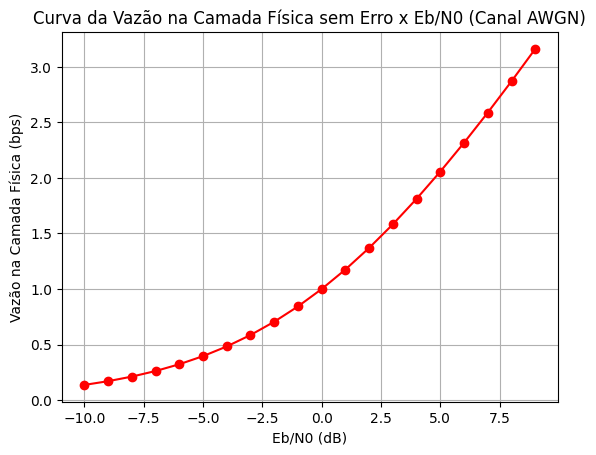

In [ ]:
def calculate_throughput(eb_no_db):
    eb_no = 10 ** (eb_no_db / 10)  # Conversão de dB para linear
    
    # Taxa de transmissão em bps (bits por segundo)
    throughput = np.log2(1 + eb_no)
    
    return throughput

# Cálculo da vazão na camada física sem erro para cada valor de Eb/N0
throughputs = [calculate_throughput(eb_no) for eb_no in EbNo_range]

# Plotagem da curva da vazão na camada física sem erro
plt.plot(EbNo_range, throughputs, marker='o', color = 'r')
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('Vazão na Camada Física (bps)')
plt.title('Curva da Vazão na Camada Física sem Erro x Eb/N0 (Canal AWGN)')
plt.grid(True)
plt.show()



####VAZÃO NA CAMADA FÍSICA COM ERRO

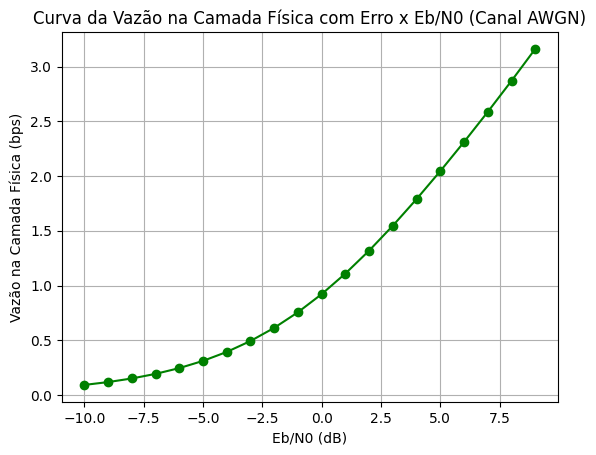

In [ ]:
def calculate_bit_error_probability(eb_no_db):
    eb_no = 10 ** (eb_no_db / 10)  # Conversão de dB para linear
    bit_error_prob = 0.5 * erfc(np.sqrt(eb_no))  # Probabilidade de erro de bit teórica
    return bit_error_prob

def calculate_throughput(eb_no_db):
    eb_no = 10 ** (eb_no_db / 10)  # Conversão de dB para linear
    
    # Probabilidade de erro de bit teórica
    bit_error_prob = calculate_bit_error_probability(eb_no_db)
    
    # Taxa de transmissão em bps (bits por segundo)
    throughput = (1 - bit_error_prob) * np.log2(1 + eb_no)
    
    return throughput



# Cálculo da vazão na camada física com erro para cada valor de Eb/N0
throughputs = [calculate_throughput(eb_no) for eb_no in EbNo_range]

# Plotagem da curva da vazão na camada física com erro
plt.plot(EbNo_range, throughputs, marker='o', color = 'g')
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('Vazão na Camada Física (bps)')
plt.title('Curva da Vazão na Camada Física com Erro x Eb/N0 (Canal AWGN)')
plt.grid(True)
plt.show()


####CORRELAÇÃO

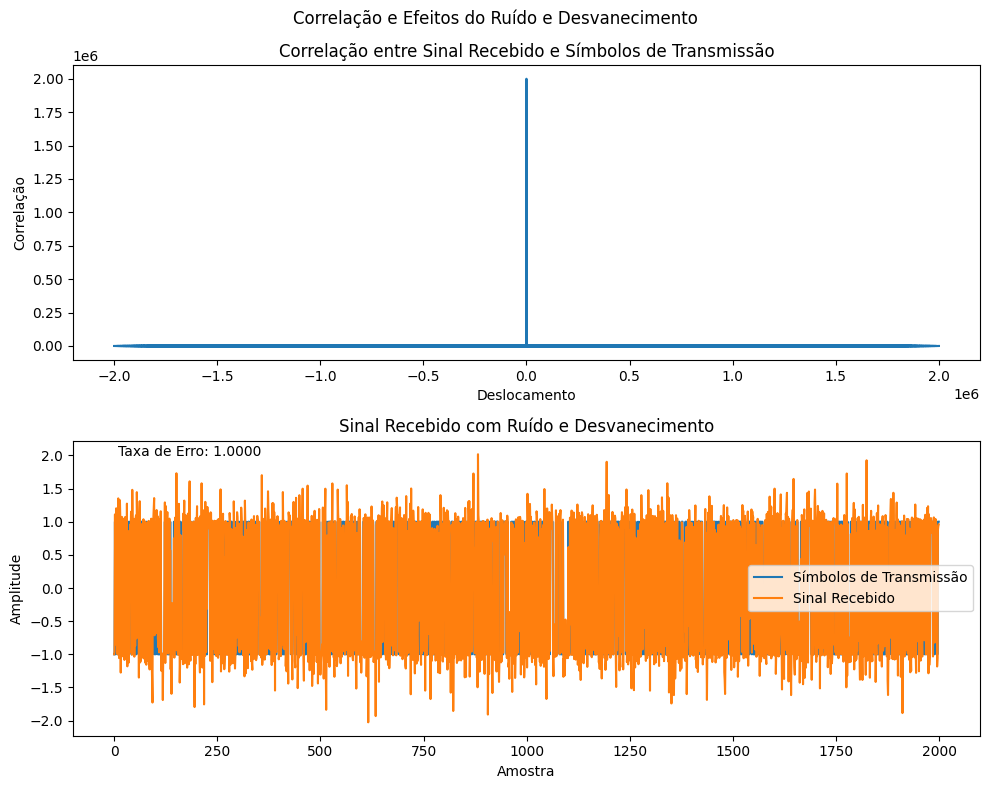

In [ ]:

# Parâmetros do canal
SNR_dB = 10  # Relação sinal-ruído em dB
fade_std = 1  # Desvio padrão do desvanecimento Rayleigh
n_samples = 2000000  # Número de amostras

# Geração dos símbolos de transmissão
tx_symbols = np.random.randint(0, 2, num_samples)  # Sequência de bits aleatórios
tx_symbols = 2 * tx_symbols - 1  # Mapeamento: 0 -> -1, 1 -> 1

# Geração do ruído gaussiano
noise_std = np.sqrt(0.5 / (10 ** (SNR_dB / 10)))  # Desvio padrão do ruído
noise = noise_std * np.random.randn(n_samples)

# Geração do desvanecimento Rayleigh
fade = fade_std * np.random.randn(n_samples)

# Sinal recebido com ruído e desvanecimento
rx_signal = tx_symbols + noise * fade

# Detecção de erros

errors = np.sum(tx_symbols != rx_signal )

# Cálculo da correlação
correlation = np.correlate(rx_signal, tx_symbols, 'full')

# Plot do resultado
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('Correlação e Efeitos do Ruído e Desvanecimento')

# Plot da correlação
axs[0].plot(range(-len(tx_symbols) + 1, len(rx_signal)), correlation)
axs[0].set_xlabel('Deslocamento')
axs[0].set_ylabel('Correlação')
axs[0].set_title('Correlação entre Sinal Recebido e Símbolos de Transmissão')

# Plot do sinal recebido
axs[1].plot(tx_symbols[:2000], label='Símbolos de Transmissão')
axs[1].plot(rx_signal[:2000], label='Sinal Recebido')
axs[1].set_xlabel('Amostra')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Sinal Recebido com Ruído e Desvanecimento')
axs[1].legend()

# Mostrar a taxa de erro
error_rate = errors / n_samples
plt.text(0.05, 0.95, f'Taxa de Erro: {error_rate:.4f}', transform=axs[1].transAxes)

plt.tight_layout()
plt.show()


In [ ]:

EbN0_linear = 10**(EbNo_range / 10)  # Conversão de dB para linear

# Geração dos símbolos de transmissão
tx_bits = np.random.randint(0, 2, num_samples)  # Sequência de bits aleatórios
tx_symbols = 2 * tx_bits - 1  # Mapeamento: 0 -> -1, 1 -> 1

# Loop para calcular a probabilidade de erro de bit  e Correlaçao para cada valor de Eb/N0
ber_simulated = []
crr = []
for snr_linear in EbN0_linear:
  
    # Cálculo do ruído AWGN
    noise_std_awgn = np.sqrt(1 / (2 * snr_linear))  # Desvio padrão do ruído AWGN
    noise_awgn = noise_std_awgn * np.random.randn(num_samples)

    # Cálculo do desvanecimento Rayleigh
    fading = np.sqrt(0.5) * (np.random.randn(num_samples) + 1j * np.random.randn(num_samples))

    # Sinal recebido com ruído AWGN e desvanecimento Rayleigh
    rx_symbols = fading * tx_symbols + noise_awgn

    # Detecção de erros
    rx_bits = np.where(rx_symbols < 0, 0, 1)
    errors = np.sum(tx_bits != rx_bits)
    ber_simulated.append(errors / num_samples)

    # Cálculo da correlação
    correlation = np.correlate(rx_symbols, tx_symbols, 'full')
    crr.append(correlation)

# Plot do resultado
#fig, axs = plt.subplots(2, 1, figsize=(10, 8))
#fig.suptitle('Correlação e Efeitos do Ruído e Desvanecimento')

# Plot da correlação
#axs[0].plot(range(-len(tx_symbols) + 1, len(rx_symbols)), correlation)
#axs[0].set_xlabel('Deslocamento')
#axs[0].set_ylabel('Correlação')
#axs[0].set_title('Correlação entre Sinal Recebido e Símbolos de Transmissão')

# Plot do sinal recebido
#axs[1].plot(tx_symbols[:2000], label='Símbolos de Transmissão')
#axs[1].plot(rx_symbols[:2000], label='Sinal Recebido')
#axs[1].set_xlabel('Amostra')
#axs[1].set_ylabel('Amplitude')
#axs[1].set_title('Sinal Recebido com Ruído e Desvanecimento')
#axs[1].legend()

#plt.text(0.05, 0.95, f'Taxa de Erro: {ber_simulated:.4f}', transform=axs[1].transAxes)

#plt.tight_layout()
#plt.show()

#plt.plot(EbNo_range, correlation, marker='o', color = 'g')
#plt.xlabel('Eb/N0 (dB)')
#plt.ylabel('Vazão na Camada Física (bps)')
#plt.title('Curva da Vazão na Camada Física com Erro x Eb/N0 (Canal AWGN)')
#plt.grid(True)
#plt.show()

In [ ]:
print(crr)